In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
%matplotlib inline

In [4]:
def prettify(s):
    if s == s.upper():
        return s
    else:
        return s.capitalize()

In [5]:
ibua_df = pd.read_excel("../Data/Growth_data/Supplementary-screening/isobutyrate_ALE-KOs_012515.xlsx", sheet_name="subtracted")
ibua_df = ibua_df.reset_index()
ibua_df = ibua_df[pd.notnull(ibua_df["Unnamed: 0"])]
ibua_df["sample"] = ibua_df["Unnamed: 2"]
del ibua_df["Unnamed: 0"]
del ibua_df["Unnamed: 1"]
del ibua_df["Unnamed: 2"]
del ibua_df["TIME [h] ->"]
del ibua_df['index']


ibua_df = ibua_df[ibua_df["sample"].notnull()]

ibua_df["strain"] = ibua_df["sample"].map(lambda x: x[:-2])
exclude_ibua_samples = ["pykF-3", "MG1655-2", "IBUA5-6_1"]
print(len(set(ibua_df["sample"])))
ibua_df = ibua_df[~ibua_df["sample"].isin(exclude_ibua_samples)]
print(len(set(ibua_df["sample"])))

exclude_ibua = ['pykF_yobF', 'rpoS', 'yobF', "pykF_rpoS", "pykF_rpoS_yobF", "IBUA2-9"]
ibua_df = ibua_df[~ibua_df["strain"].isin(exclude_ibua)]


33
30


In [6]:
ibua_mage_df = pd.read_excel(
    "../Data/Growth_data/Supplementary-screening/isobutyrate_MAGE-mutants_2,3-butanediol_1,2-propanediol_ALE-KOs_030516.xlsx", sheet_name="subtracted"
)
ibua_mage_df = ibua_mage_df.reset_index()
ibua_mage_df = ibua_mage_df[pd.notnull(ibua_mage_df["Unnamed: 0"])]
ibua_mage_df["sample"] = ibua_mage_df["Unnamed: 2"]
ibua_mage_df = ibua_mage_df[ibua_mage_df["Unnamed: 3"].str.contains("isobutyrate")]

del ibua_mage_df["Unnamed: 0"]
del ibua_mage_df["Unnamed: 1"]
del ibua_mage_df["Unnamed: 2"]
del ibua_mage_df["Unnamed: 3"]
del ibua_mage_df["TIME [h] ->"]
del ibua_mage_df['index']


ibua_mage_df["strain"] = ibua_mage_df["sample"].map(lambda x: x[:-2])
exclude_ibua_mage_samples = []
ibua_mage_df = ibua_mage_df[~ibua_mage_df["sample"].isin(exclude_ibua_mage_samples)]

exclude_ibua_mage = ["pykF", "pykF_ilvH", "glyQ", "pykF_glyQ", "ilvH_glyQ", "pykF_ilvH_glyQ"]
ibua_mage_df = ibua_mage_df[~ibua_mage_df["strain"].isin(exclude_ibua_mage)]

In [7]:
bcaa_df_1 = pd.read_excel("../Data/Growth_data/Supplementary-screening/isobutyrate_BCAA-feeding_060515.xlsx", sheet_name="subtracted")
bcaa_df_1 = bcaa_df_1.reset_index()
bcaa_df_1 = bcaa_df_1[pd.notnull(bcaa_df_1["Unnamed: 0"])]
bcaa_df_1["sample"] = bcaa_df_1["Unnamed: 2"]
bcaa_df_1["medium"] = bcaa_df_1["Unnamed: 3"]

del bcaa_df_1["Unnamed: 0"]
del bcaa_df_1["Unnamed: 1"]
del bcaa_df_1["Unnamed: 2"]
del bcaa_df_1["Unnamed: 3"]
del bcaa_df_1["TIME [h] ->"]
del bcaa_df_1['index']

bcaa_df_1["strain"] = bcaa_df_1["sample"].map(lambda x: x[:-2])


bcaa_df_2 = pd.read_excel("../Data/Growth_data/Supplementary-screening/isobutyrate_BCAA-feeding_062915.xlsx", sheet_name="subtracted")
bcaa_df_2 = bcaa_df_2.reset_index()
bcaa_df_2 = bcaa_df_2[pd.notnull(bcaa_df_2["Unnamed: 0"])]
bcaa_df_2["sample"] = bcaa_df_2["Unnamed: 2"]
bcaa_df_2["medium"] = bcaa_df_2["Unnamed: 3"]

del bcaa_df_2["Unnamed: 0"]
del bcaa_df_2["Unnamed: 1"]
del bcaa_df_2["Unnamed: 2"]
del bcaa_df_2["Unnamed: 3"]
del bcaa_df_2["TIME [h] ->"]
del bcaa_df_2['index']


bcaa_df_2["strain"] = bcaa_df_2["sample"].map(lambda x: x[:-2])


bcaa_df_3 = pd.read_excel("../Data/Growth_data/Supplementary-screening/isobutyrate_BCAA-feeding_070215.xlsx", sheet_name="subtracted")
bcaa_df_3 = bcaa_df_3.reset_index()
bcaa_df_3 = bcaa_df_3[pd.notnull(bcaa_df_3["Unnamed: 0"])]
bcaa_df_3["sample"] = bcaa_df_3["Unnamed: 2"]
bcaa_df_3["medium"] = bcaa_df_3["Unnamed: 3"]
bcaa_df_3 = bcaa_df_3[pd.notnull(bcaa_df_3["sample"])]

del bcaa_df_3["Unnamed: 0"]
del bcaa_df_3["Unnamed: 1"]
del bcaa_df_3["Unnamed: 2"]
del bcaa_df_3["Unnamed: 3"]
del bcaa_df_3["TIME [h] ->"]
del bcaa_df_3['index']

bcaa_df_3["strain"] = bcaa_df_3["sample"].map(lambda x: x[:-2])

In [8]:
colors = ["#66358c", "#feba19", "#28a6e0", "#1c783c"]
label_dict = {
    "kgtP": "$\Delta$kgtP",
    "kgtP_proV": "$\Delta$kgtP $\Delta$proV",
    "kgtP_proV_ybjL": "$\Delta$kgtP $\Delta$proV $\Delta$ybjL",
    "pykF": "$\Delta$pykF",
    "ilvH": "MG1655 ilvH-L9F"
}

def plot_curves(df, last_label="", xmax=30, ymax=30, use_gray=True, strain_order=None):
    color_it = iter(colors)
    strain_means = df.groupby("strain").mean().transpose()
    strain_stds = df.groupby("strain").std().transpose() #/ 3**0.5
    if strain_order is None:
        columns = strain_means.columns
    else:
        columns = strain_order
    for i, strain in enumerate(columns):
        # plt.subplot(5, 5, i+1)
        # plt.title(strain)
        if use_gray and (strain.startswith("ADIP") or strain.startswith("GLUT") or strain.startswith("IBUA")):
            label = None
            color = "grey"
        else:
            label = strain
            color=next(color_it)
        plt.plot(strain_means.index, strain_means[strain].values, color=color, linewidth=3)
        plt.fill_between(
            strain_means.index.astype("float"),
            (strain_means[strain] + strain_stds[strain]).values,
            (strain_means[strain] - strain_stds[strain]).values,
            color=color,
            alpha=0.4
        )
        plt.fill_between([0, 0], [0, 0], color=color, label=label_dict.get(label, label))
    plt.fill_between([0, 0], [0, 0], color="grey", label=last_label)
    plt.ylim([-2, ymax])
    plt.xlim([0, xmax])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Time (h)", fontsize=16)
    plt.ylabel("Cell density (a.u.)", fontsize=16)
    plt.grid(axis="y")

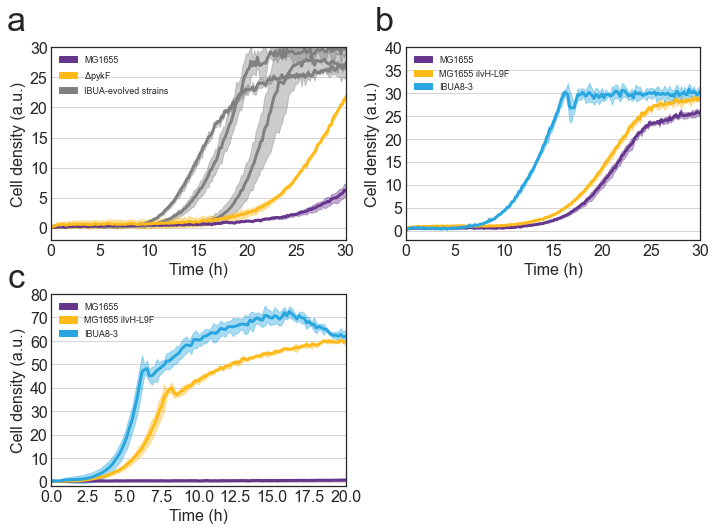

In [10]:
plt.style.use("seaborn-white")

legend_fs = 9

fig = plt.figure(figsize=[10, 7])


plt.subplot(2, 2, 1)
plot_curves(ibua_df, last_label="IBUA-evolved strains")
plt.legend(loc="upper left", fontsize=legend_fs)

plt.subplot(2, 2, 2)
plot_curves(
    bcaa_df_3[bcaa_df_3["medium"] == "M9 + isobutyrate"], use_gray=False, ymax=40,
    strain_order=["MG1655", "ilvH", "IBUA8-3"]
)
plt.legend(loc="upper left", fontsize=legend_fs)

plt.subplot(2, 2, 3)
plot_curves(
    bcaa_df_2[bcaa_df_2["medium"] == "M9 + valine"], use_gray=False, ymax=80, xmax=20,
    strain_order=["MG1655", "ilvH", "IBUA8-3"]
)
plt.legend(loc="upper left", fontsize=legend_fs)



row_1 = 1
row_2 = 0.49

col_1 = 0.01
col_2 = 0.52
col_3 = 0.67

fig.text(col_1, row_1, "a", fontsize=34)
fig.text(col_2, row_1, "b", fontsize=34)
fig.text(col_1, row_2, "c", fontsize=34)


plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 8 - IBUA Mechanisms.svg", bbox_inches="tight")